In [1]:
import os
import torch
from flows import PlanarFlow
import matplotlib.pyplot as plt
import numpy as np
from NormVAE import FlowVAE, BernoulliDecoder, LogitNormalDecoder
from train import test

In [14]:
# Hyperprameters
dataset_name = 'mnist'
img_size = [1, 28 ,28]
batch_size = 256
flow_lengths = [10, 20, 40, 80]
beta_list = [0.5, 1.0, 2.0, 3.0, 4.0]
dim_z = 40
dim_h = 256
load_epoch = 50

In [15]:
# Load models and test

mnist_models = []

beta_kl_loss = []
beta_recon_loss = []

for beta in beta_list:
    kl_loss = []
    recon_loss = []

    for nflow in flow_lengths:
        load_path = os.path.join(f'{os.getcwd()}/checkpoint', f'{dataset_name}/{nflow}/{beta}')
        decoder = BernoulliDecoder(img_size, dim_z, dim_h)
        flows = [PlanarFlow(dim_z) for _ in range(nflow)]
        model = FlowVAE(img_size, dim_h, dim_z, decoder, flows)
        model.load_model(load_path, load_epoch, device=torch.device("cuda:0"))
        recon, kl = test(model, dataset_name, nflow, batch_size, load_epoch, beta)
        recon_loss.append(recon)
        kl_loss.append(kl)
        mnist_models.append(model)

    beta_kl_loss.append(kl_loss)
    beta_recon_loss.append(recon_loss)


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/10/0.5
Files already downloaded and verified
Load Model from checkpoint/mnist/10/0.5


100%|██████████| 40/40 [00:00<00:00, 42.98it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/20/0.5
Files already downloaded and verified
Load Model from checkpoint/mnist/20/0.5


100%|██████████| 40/40 [00:00<00:00, 44.18it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/40/0.5
Files already downloaded and verified
Load Model from checkpoint/mnist/40/0.5


100%|██████████| 40/40 [00:00<00:00, 41.25it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/80/0.5
Files already downloaded and verified
Load Model from checkpoint/mnist/80/0.5


100%|██████████| 40/40 [00:01<00:00, 37.18it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/10/1.0
Files already downloaded and verified
Load Model from checkpoint/mnist/10/1.0


100%|██████████| 40/40 [00:00<00:00, 44.76it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/20/1.0
Files already downloaded and verified
Load Model from checkpoint/mnist/20/1.0


100%|██████████| 40/40 [00:00<00:00, 44.84it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/40/1.0
Files already downloaded and verified
Load Model from checkpoint/mnist/40/1.0


100%|██████████| 40/40 [00:00<00:00, 41.77it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/80/1.0
Files already downloaded and verified
Load Model from checkpoint/mnist/80/1.0


100%|██████████| 40/40 [00:01<00:00, 36.01it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/10/2.0
Files already downloaded and verified
Load Model from checkpoint/mnist/10/2.0


100%|██████████| 40/40 [00:00<00:00, 44.42it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/20/2.0
Files already downloaded and verified
Load Model from checkpoint/mnist/20/2.0


100%|██████████| 40/40 [00:00<00:00, 41.46it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/40/2.0
Files already downloaded and verified
Load Model from checkpoint/mnist/40/2.0


100%|██████████| 40/40 [00:00<00:00, 41.35it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/80/2.0
Files already downloaded and verified
Load Model from checkpoint/mnist/80/2.0


100%|██████████| 40/40 [00:01<00:00, 37.09it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/10/3.0
Files already downloaded and verified
Load Model from checkpoint/mnist/10/3.0


100%|██████████| 40/40 [00:00<00:00, 45.00it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/20/3.0
Files already downloaded and verified
Load Model from checkpoint/mnist/20/3.0


100%|██████████| 40/40 [00:00<00:00, 43.91it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/40/3.0
Files already downloaded and verified
Load Model from checkpoint/mnist/40/3.0


100%|██████████| 40/40 [00:00<00:00, 41.58it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/80/3.0
Files already downloaded and verified
Load Model from checkpoint/mnist/80/3.0


100%|██████████| 40/40 [00:01<00:00, 37.06it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/10/4.0
Files already downloaded and verified
Load Model from checkpoint/mnist/10/4.0


100%|██████████| 40/40 [00:00<00:00, 45.42it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/20/4.0
Files already downloaded and verified
Load Model from checkpoint/mnist/20/4.0


100%|██████████| 40/40 [00:00<00:00, 44.28it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/40/4.0
Files already downloaded and verified
Load Model from checkpoint/mnist/40/4.0


100%|██████████| 40/40 [00:00<00:00, 41.43it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/mnist/80/4.0
Files already downloaded and verified
Load Model from checkpoint/mnist/80/4.0


100%|██████████| 40/40 [00:01<00:00, 36.83it/s]


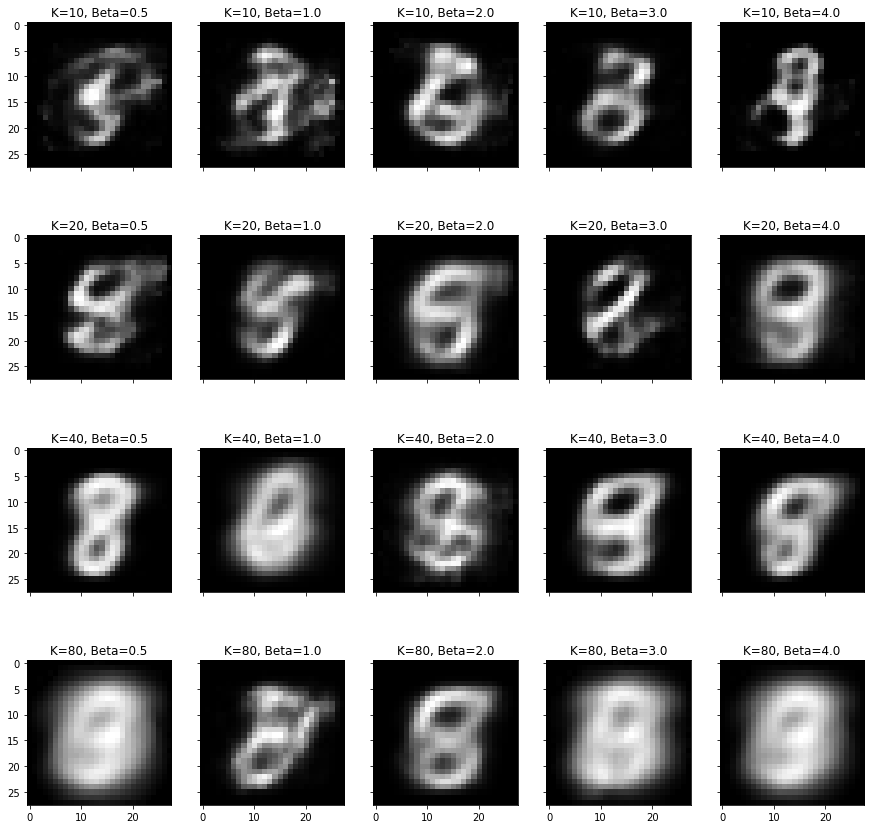

In [16]:
# Sample images from models
fig, ax = plt.subplots(len(flow_lengths), len(beta_list), figsize=(15,15), sharex='col', sharey='row')

for idx, model in enumerate(mnist_models):
    img = model.sample_img(deterministic=True)
    x, y = divmod(idx, len(beta_list))
    ax[x][y].imshow(img[0][0], cmap='gray')
    ax[x][y].set_title(f'K={flow_lengths[x]}, Beta={beta_list[y]}')

plt.show()


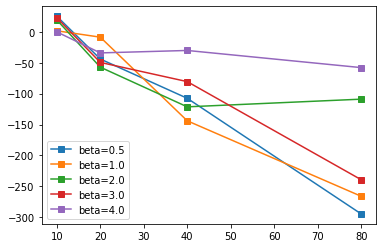

In [17]:
# Plot the KL for each beta
for idx, beta in enumerate(beta_list):
    kl_loss = beta_kl_loss[idx]
    plt.plot(flow_lengths, kl_loss, label=f"beta={beta}", marker="s")

plt.legend()
plt.show()

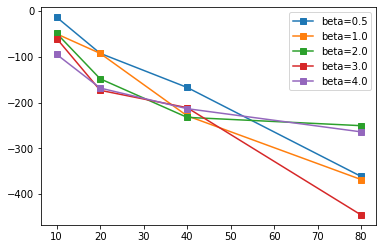

In [18]:
# Plot the F(x) for each beta
for idx, beta in enumerate(beta_list):
    elbo_loss = [kl - recon for kl, recon in zip(beta_kl_loss[idx], beta_recon_loss[idx])]
    plt.plot(flow_lengths, elbo_loss, label=f"beta={beta}", marker="s")

plt.legend()
plt.show()

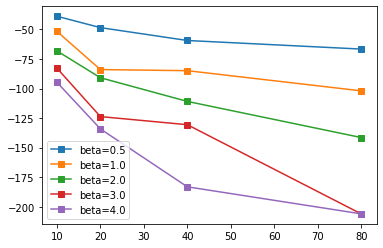

In [23]:
# Plot the reconstruction loss for each beta
for idx, beta in enumerate(beta_list):
    recon_loss = [-loss for loss in beta_recon_loss[idx]]
    plt.plot(flow_lengths, recon_loss, label=f"beta={beta}", marker="s")

plt.legend()
plt.show()

In [30]:
# Hyperprameters
dataset_name = 'cifar10'
img_size = [3, 32, 32]
batch_size = 256
flow_lengths = [10, 20, 40, 80]
beta_list = [0.5, 1.0, 2.0, 3.0, 4.0]
dim_z = 40
dim_h = 256
load_epoch = 50

In [31]:
cifar10_models = []

beta_kl_loss = []
beta_recon_loss = []

for beta in beta_list:
    kl_loss = []
    recon_loss = []

    for nflow in flow_lengths:
        load_path = os.path.join(f'{os.getcwd()}/checkpoint', f'{dataset_name}/{nflow}/{beta}')
        decoder = LogitNormalDecoder(img_size, dim_z, dim_h)
        flows = [PlanarFlow(dim_z) for _ in range(nflow)]
        model = FlowVAE(img_size, dim_h, dim_z, decoder, flows)
        model.load_model(load_path, load_epoch, device=torch.device("cuda:0"))
        recon, kl = test(model, dataset_name, nflow, batch_size, load_epoch, beta)
        recon_loss.append(recon)
        kl_loss.append(kl)
        cifar10_models.append(model)

    beta_kl_loss.append(kl_loss)
    beta_recon_loss.append(recon_loss)

Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/10/0.5
Files already downloaded and verified
Load Model from checkpoint/cifar10/10/0.5


100%|██████████| 40/40 [00:01<00:00, 22.67it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/20/0.5
Files already downloaded and verified
Load Model from checkpoint/cifar10/20/0.5


100%|██████████| 40/40 [00:01<00:00, 20.78it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/40/0.5
Files already downloaded and verified
Load Model from checkpoint/cifar10/40/0.5


100%|██████████| 40/40 [00:01<00:00, 20.90it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/80/0.5
Files already downloaded and verified
Load Model from checkpoint/cifar10/80/0.5


100%|██████████| 40/40 [00:02<00:00, 18.65it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/10/1.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/10/1.0


100%|██████████| 40/40 [00:01<00:00, 22.67it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/20/1.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/20/1.0


100%|██████████| 40/40 [00:01<00:00, 21.66it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/40/1.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/40/1.0


100%|██████████| 40/40 [00:01<00:00, 20.45it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/80/1.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/80/1.0


100%|██████████| 40/40 [00:02<00:00, 19.29it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/10/2.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/10/2.0


100%|██████████| 40/40 [00:01<00:00, 23.19it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/20/2.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/20/2.0


100%|██████████| 40/40 [00:01<00:00, 21.80it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/40/2.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/40/2.0


100%|██████████| 40/40 [00:02<00:00, 19.89it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/80/2.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/80/2.0


100%|██████████| 40/40 [00:02<00:00, 19.56it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/10/3.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/10/3.0


100%|██████████| 40/40 [00:01<00:00, 22.34it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/20/3.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/20/3.0


100%|██████████| 40/40 [00:01<00:00, 21.71it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/40/3.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/40/3.0


100%|██████████| 40/40 [00:01<00:00, 20.48it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/80/3.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/80/3.0


100%|██████████| 40/40 [00:02<00:00, 19.42it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/10/4.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/10/4.0


100%|██████████| 40/40 [00:01<00:00, 22.47it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/20/4.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/20/4.0


100%|██████████| 40/40 [00:01<00:00, 21.85it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/40/4.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/40/4.0


100%|██████████| 40/40 [00:02<00:00, 19.97it/s]


Load Model from /home/nus/workspace/variational-inference/checkpoint/cifar10/80/4.0
Files already downloaded and verified
Load Model from checkpoint/cifar10/80/4.0


100%|██████████| 40/40 [00:02<00:00, 19.51it/s]


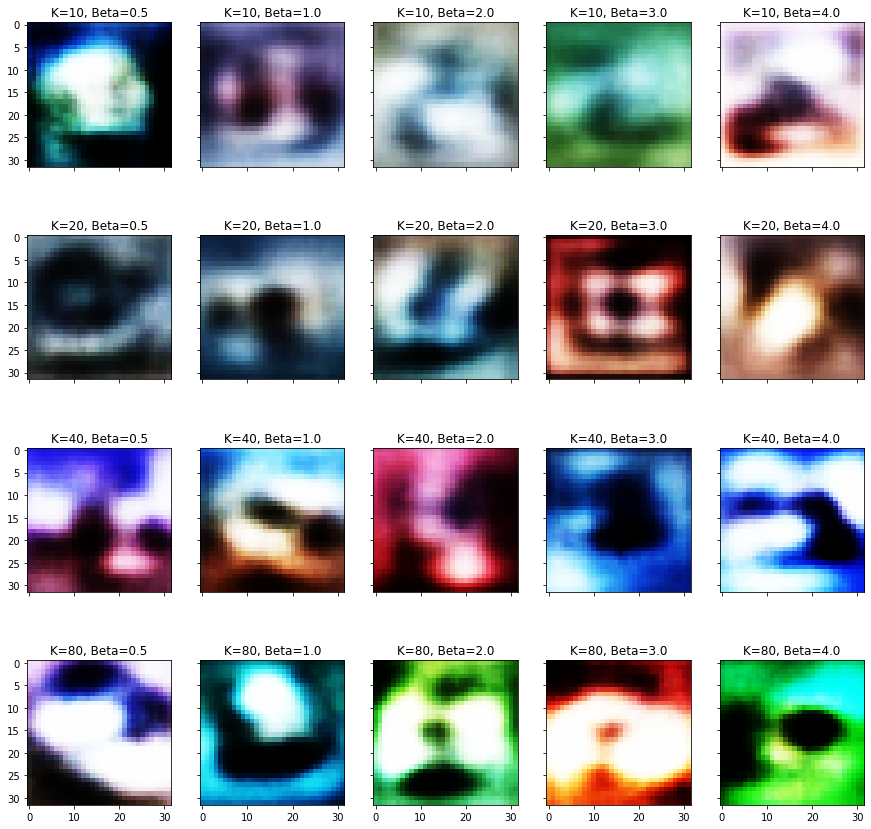

In [32]:
# Sample images from models
fig, ax = plt.subplots(len(flow_lengths), len(beta_list), figsize=(15,15), sharex='col', sharey='row')

for idx, model in enumerate(cifar10_models):
    img = model.sample_img().squeeze().permute([1,2,0]).numpy()*255
    img = img.astype(np.uint8)
    x, y = divmod(idx, len(beta_list))
    ax[x][y].imshow(img)
    ax[x][y].set_title(f'K={flow_lengths[x]}, Beta={beta_list[y]}')

plt.show()

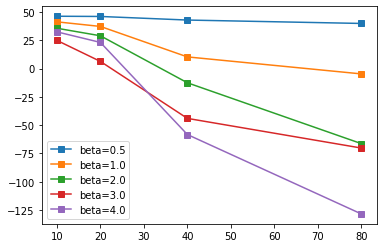

In [33]:
# Plot the KL for each beta
for idx, beta in enumerate(beta_list):
    kl_loss = beta_kl_loss[idx]
    plt.plot(flow_lengths, kl_loss, label=f"beta={beta}", marker="s")

plt.legend()
plt.show()

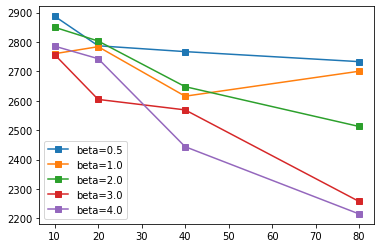

In [34]:
# Plot the F(x) for each beta
for idx, beta in enumerate(beta_list):
    elbo_loss = [kl - recon for kl, recon in zip(beta_kl_loss[idx], beta_recon_loss[idx])]
    plt.plot(flow_lengths, elbo_loss, label=f"beta={beta}", marker="s")

plt.legend()
plt.show()

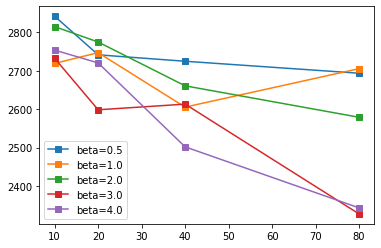

In [35]:
# Plot the reconstruction loss for each beta
for idx, beta in enumerate(beta_list):
    recon_loss = [-loss for loss in beta_recon_loss[idx]]
    plt.plot(flow_lengths, recon_loss, label=f"beta={beta}", marker="s")

plt.legend()
plt.show()